In [19]:
import matplotlib.pyplot as plt
import numpy as np


In [20]:
# Načtení dat ze souboru EMG.txt
data = np.loadtxt('../assets/EMG.txt')

# Extrahujeme časové razítko a hodnoty EMG signálu
time = data[:, 0]
emg1 = data[:, 1]
emg2 = data[:, 2]


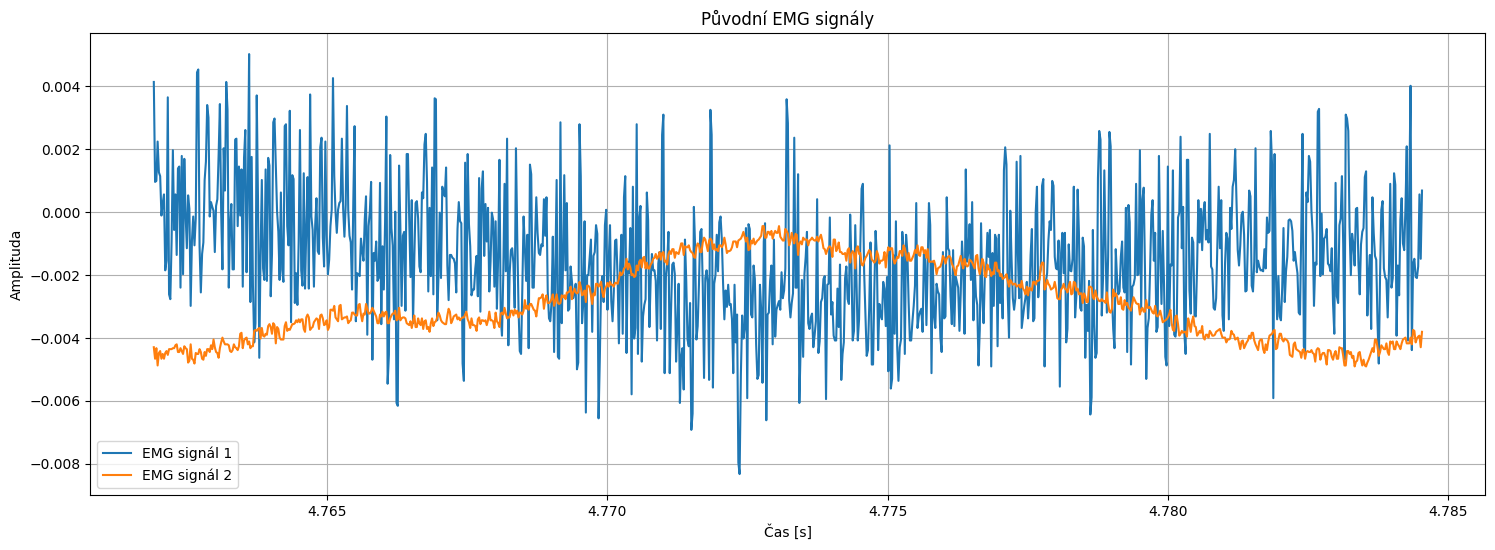

In [21]:
# Vykreslení původního EMG signálu
plt.figure(figsize=(18, 6))
plt.plot(time, emg1, label='EMG signál 1')
plt.plot(time, emg2, label='EMG signál 2')
plt.title('Původní EMG signály')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()


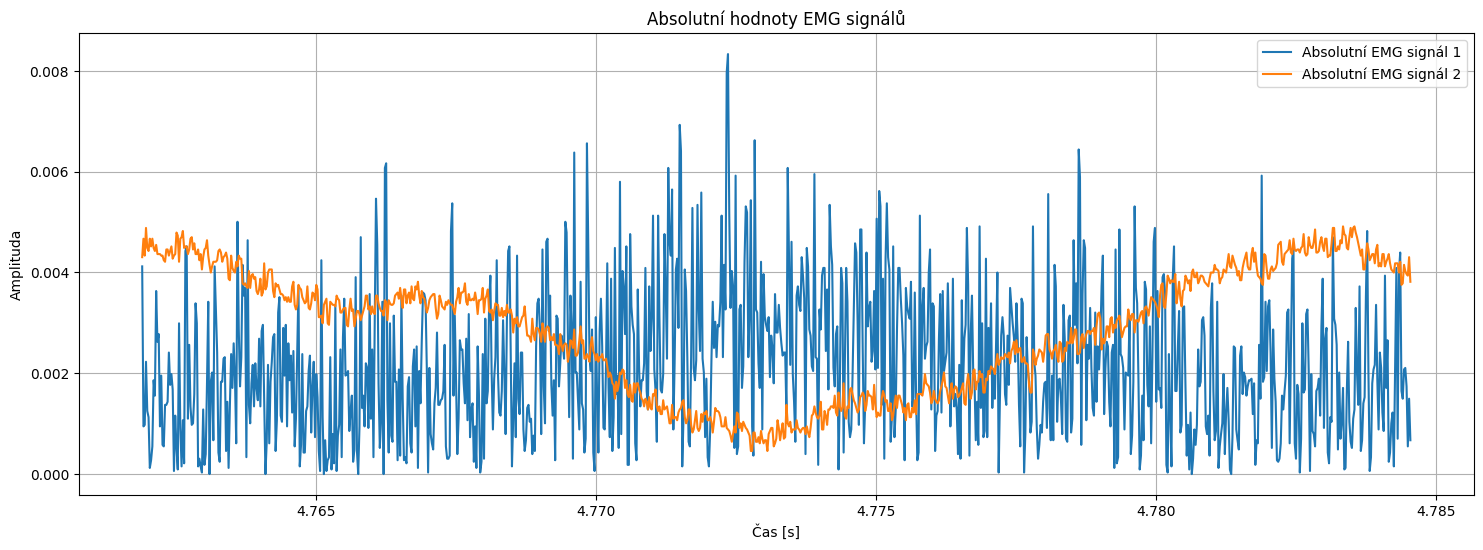

In [22]:
# Spočítání absolutní hodnoty EMG signálu
emg1_abs = np.abs(emg1)
emg2_abs = np.abs(emg2)


# Vykreslení absolutních hodnot EMG signálů
plt.figure(figsize=(18, 6))
plt.plot(time, emg1_abs, label='Absolutní EMG signál 1')
plt.plot(time, emg2_abs, label='Absolutní EMG signál 2')
plt.title('Absolutní hodnoty EMG signálů')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

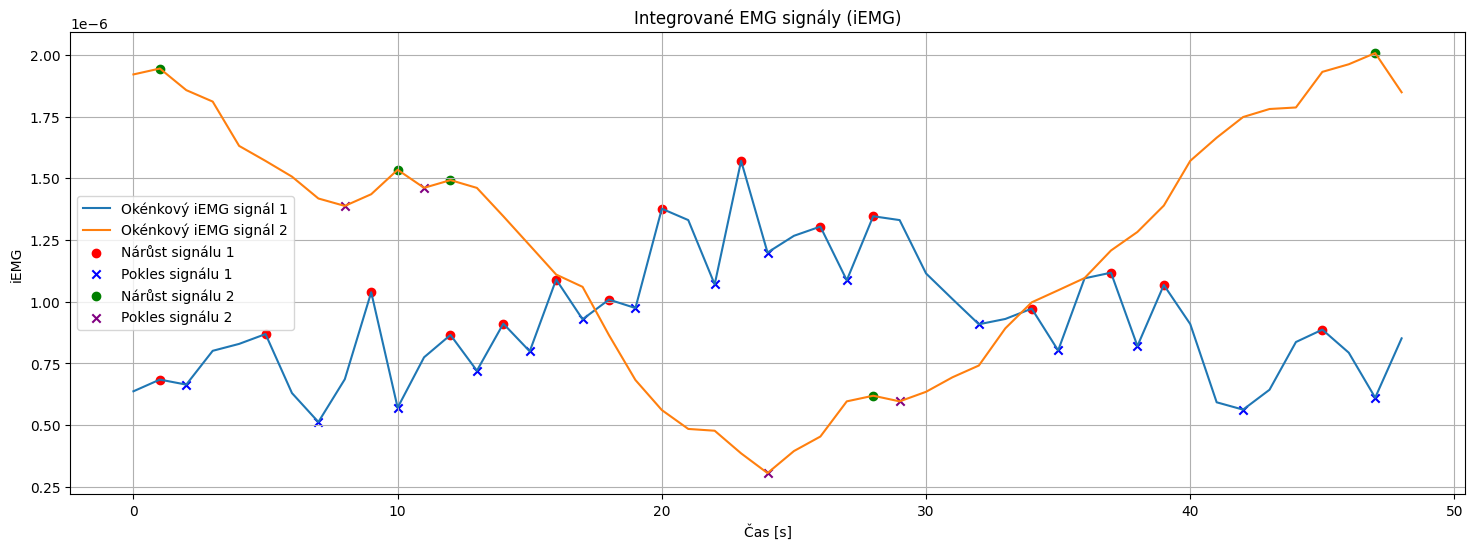

In [26]:
# Výpočet integrovaného EMG (iEMG) pomocí trapezoidální metody
iemg1 = np.trapz(emg1_abs, time)
iemg2 = np.trapz(emg2_abs, time)

# Funkce pro výpočet okénkového iEMG
def windowed_iemg(signal, time, window_size):
    num_windows = len(signal) // window_size
    windowed_iemg_values = []
    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        window_iemg = np.trapz(np.abs(signal[start:end]), time[start:end])
        windowed_iemg_values.append(window_iemg)
    return np.array(windowed_iemg_values)


# Funkce pro nalezení nárůstů a poklesů
def find_peaks_troughs(signal):
    peaks = []
    troughs = []
    for i in range(1, len(signal) - 1):
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            peaks.append(i)
        elif signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
            troughs.append(i)
    return peaks, troughs


# Definujeme velikost okénka
window_size = 20


# Výpočet okénkového iEMG pro oba signály
windowed_iemg1 = windowed_iemg(emg1, time, window_size)
windowed_iemg2 = windowed_iemg(emg2, time, window_size)


# Nalezení nárůstů a poklesů v okénkových iEMG signálech
peaks1, troughs1 = find_peaks_troughs(windowed_iemg1)
peaks2, troughs2 = find_peaks_troughs(windowed_iemg2)


# Vykreslení iEMG signálů
plt.figure(figsize=(18, 6))
plt.plot(range(len(windowed_iemg1)), windowed_iemg1, label='Okénkový iEMG signál 1')
plt.plot(range(len(windowed_iemg2)), windowed_iemg2, label='Okénkový iEMG signál 2')


# Označení nárůstů a poklesů pro signál 1
plt.scatter(peaks1, windowed_iemg1[peaks1], color='red', marker='o', label='Nárůst signálu 1')
plt.scatter(troughs1, windowed_iemg1[troughs1], color='blue', marker='x', label='Pokles signálu 1')

# Označení nárůstů a poklesů pro signál 2
plt.scatter(peaks2, windowed_iemg2[peaks2], color='green', marker='o', label='Nárůst signálu 2')
plt.scatter(troughs2, windowed_iemg2[troughs2], color='purple', marker='x', label='Pokles signálu 2')


plt.title('Integrované EMG signály (iEMG)')
plt.xlabel('Čas [s]')
plt.ylabel('iEMG')
plt.legend()
plt.grid(True)
plt.show()